<a href="https://colab.research.google.com/github/Shobhit0403/Machine-learning-/blob/main/Image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
import keras 


In [4]:
(X_train,y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [5]:
import numpy as np
len(np.unique(y_train)) 
# len(set(y_train)) 

10

## there is no validation set, ...Scaling

In [6]:
X_valid, X_train = X_train[:5000]/255.0 , X_train[5000:]/255.0
y_valid, y_train = y_train[:5000] , y_train[5000:]
print(X_train.shape, X_valid.shape)

(55000, 28, 28) (5000, 28, 28)


In [7]:
class_name = ["Top", "trouset" , "pullover", "Dress", "Coat", "sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Model

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28])) #role is tol convert i/p omg to 1D arry, computes X.reshape(-1,1)
model.add(keras.layers.Dense(300,activation= "relu")) #300 neurons, manages 1. its own weights 2. containing all the connections b/w neurons and i/p's 3. vecotr of bias term
model.add(keras.layers.Dense(100,activation= "relu")) 
model.add(keras.layers.Dense(10,activation= "softmax"))

In [9]:
"""
model = keras.models.Sequential([
  model.add(keras.layers.Flatten(input_shape=[28,28])) #role is tol convert i/p omg to 1D arry, computes X.reshape(-1,1)
  model.add(keras.layers.Dense(300,activation= "relu")) #300 neurons, manages 1. its own weights 2. containing all the connections b/w neurons and i/p's 3. vecotr of bias term
  model.add(keras.layers.Dense(100,activation= "relu")) 
  model.add(keras.layers.Dense(10,activation= "relu"))
])

"""

'\nmodel = keras.models.Sequential([\n  model.add(keras.layers.Flatten(input_shape=[28,28])) #role is tol convert i/p omg to 1D arry, computes X.reshape(-1,1)\n  model.add(keras.layers.Dense(300,activation= "relu")) #300 neurons, manages 1. its own weights 2. containing all the connections b/w neurons and i/p\'s 3. vecotr of bias term\n  model.add(keras.layers.Dense(100,activation= "relu")) \n  model.add(keras.layers.Dense(10,activation= "relu"))\n])\n\n'

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
# initilaizaiton of the weights, can be random KERNEL_INITIALIZER OR BIAS_INITIALIZER 

In [12]:
model.compile(loss="sparse_categorical_crossentropy",optimizer = "sgd", metrics=["accuracy"]) #  method to specifu the loss function and the optimizer to use
y_train.shape

(55000,)

In [13]:
history = model.fit(X_train, y_train, epochs=30,validation_data=(X_valid,y_valid), batch_size=None)

Epoch 1/30
1719/1719 [==============================] - 6s 2ms/step - loss: 1.0077 - accuracy: 0.6799 - val_loss: 0.5466 - val_accuracy: 0.7992
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4977 - accuracy: 0.8271 - val_loss: 0.4493 - val_accuracy: 0.8476
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4431 - accuracy: 0.8441 - val_loss: 0.4323 - val_accuracy: 0.8502
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4147 - accuracy: 0.8541 - val_loss: 0.3875 - val_accuracy: 0.8702
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3916 - accuracy: 0.8615 - val_loss: 0.3727 - val_accuracy: 0.8712
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3806 - accuracy: 0.8662 - val_loss: 0.3665 - val_accuracy: 0.8710
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3621 - accuracy: 0.8724 - val_loss: 0.3631 - val_accuracy:

## history.params 
## history.epoch
## history.history 

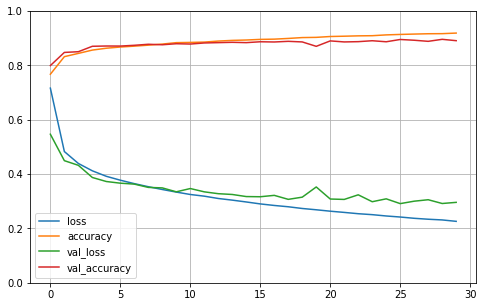

In [14]:
import pandas as pd 
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [19]:
model.evaluate(X_test, y_test , batch_size=1
               )

10000/10000 [==============================] - 19s 2ms/step - loss: 66.2332 - accuracy: 0.8478


[66.23324584960938, 0.8478000164031982]

In [21]:
y_predict =  model.predict_classes(X_test[:3])
y_predict

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([9, 2, 1])